In [2]:
import wikipedia
import numpy as np
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import re

In [3]:
##need to make sure this csv resides in the same location as this python notebook
##parse csv file of open source data into a dictionary
nyc_open_data = {}
with open('parks_and_pops.csv') as csvfile:
    file = csv.reader(csvfile, delimiter=',')
    first = True
    for row in file:
        ##exclude column headers
        if not first :
            name = row[5]
            nyc_open_data[name]={}
            nyc_open_data[name]['address'] = row[8]
            nyc_open_data[name]['boro']=row[10]
            nyc_open_data[name]['zipcode']=row[12]
            nyc_open_data[name]['latitude']=row[13]
            nyc_open_data[name]['longitude']=row[14]
            nyc_open_data[name]['type']=row[26]
            nyc_open_data[name]['summary']=row[26]
        else:
            first = False

##gather data on boro distribution and type of feature distribution
boros = set()
types = set()
for name in nyc_open_data:
    boros.add(nyc_open_data[name]['boro'])
    types.add(nyc_open_data[name]['type'])

print(len(boros))
print(boros)

print(len(types))
print(types)

count = 0
for name in nyc_open_data:
    if nyc_open_data[name]['type'] == 'Privately Owned Public Space':
        count+=1
print(count)

count_types = {}
for feature in types:
    count_types[feature]=0

count_boros = {}
for boro in boros:
    count_boros[boro]=0
    
for name in nyc_open_data:
    feature = nyc_open_data[name]['type']
    boro = nyc_open_data[name]['boro']
    count_types[feature]+=1
    count_boros[boro]+=1

##filter to only types we are interested in
major_types = {}
major_types['Park']=0
major_types['Pops']=0
major_types['Playground']=0
major_types['Garden']=0
for feature in count_types:
    if 'Park' in feature:
        major_types['Park']+=count_types[feature]
    if 'Privately Owned Public Space' == feature:
        major_types['Pops']+=count_types[feature]
    if 'Playground' in feature:
        major_types['Playground']+=count_types[feature]
    if 'Garden' in feature:
        major_types['Garden']+=count_types[feature]

6
{'Brooklyn', 'Staten Is', 'Staten Island', 'Bronx', 'Manhattan', 'Queens'}
49
{'Recreation Field/Courts', 'Community Park', 'Mall/Triangle/Highway Strip/Park Strip', 'State Park', 'Park', 'Nature Area', 'Playground/Sports Area', 'Waterfront Facility', 'Tidal Wetland', 'Buildings/Institutions', 'Playground', 'Botanical Garden', 'Privately Owned Public Space', 'State Forest', 'Special Recreational Facility - Indoor', 'Neighborhood Sitting Area', 'Mall', 'Open Space', 'Managed Sites', 'Sitting Area', 'Recreation Center/Gymnasium', 'Accessory Play Area', 'Regional Park', 'Trailway', 'Natural Area/Wetland/Wildlife Refuge', 'City-State Park', 'Indoor Pool', 'Outdoor Pool', 'Community Garden', 'Natural Resource Area', 'Garden', 'Beach', 'Parkway', 'Flagship Park', 'Playing Field', 'Special Recreational Facility - Outdoor', 'State Park Preserve', 'Strip', 'Tennis Court, Basketball Court, Etc', 'Stadium', 'Unique Area', 'Pedestrian Plaza', 'Recreational Facility', 'Triangle/Plaza', 'Freshwate

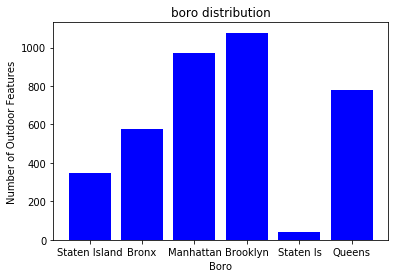

In [4]:
n = len(boros)
number = [count_boros[boro] for boro in list(count_boros.keys())]
index = np.arange(len(boros))

plt.bar(index, number, color='b',label='boro distribution')

plt.title('boro distribution')
plt.xlabel('Boro')
plt.ylabel('Number of Outdoor Features')
plt.xticks(index, [boro for boro in list(count_boros.keys())])

plt.show()

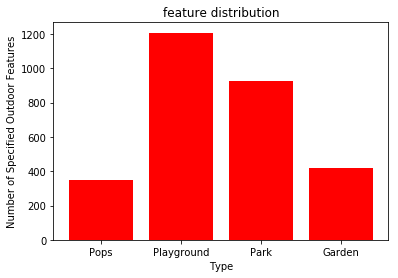

In [4]:
n = len(types)
number = [major_types[feature] for feature in list(major_types.keys())]
index = np.arange(len(major_types.keys()))

plt.bar(index, number, color='r',label='feature distribution')

plt.title('feature distribution')
plt.xlabel('Type')
plt.ylabel('Number of Specified Outdoor Features')
plt.xticks(index, [feature for feature in list(major_types.keys())])

plt.show()

In [5]:
data={}

In [6]:
#obtain links to privatley owned public spaces
wiki_pops = wikipedia.WikipediaPage(title = 'List of privately owned public spaces in New York City').links
pops_count=0

In [7]:
##cross open source data and wikipedia data and create a new dictionary
for pop in wiki_pops :
    try:
        if pop in nyc_open_data:
            summary = re.sub(r'[^\w\s]','', wikipedia.WikipediaPage(title = pop).summary)
            contents = re.sub(r'[^\w\s]','', wikipedia.WikipediaPage(title = pop).content)
            summary=re.sub('\s+',' ',summary)
            contents = re.sub('\s+',' ',contents)
            pops_count += 1
            data[pop]={}
            
            if(nyc_open_data[pop].get('address')!=None):
                data[pop]['address'] = nyc_open_data[pop]['address']
            else:
                data[pop]['address']=''
                
            if(nyc_open_data[pop].get('boro')!=None):
                data[pop]['boro'] = nyc_open_data[pop]['boro']
            else:
                data[pop]['boro']=''
                
            if(nyc_open_data[pop].get('zipcode')!=None):
                data[pop]['zipcode'] = nyc_open_data[pop]['zipcode']
            else:
                data[pop]['zipcode']=''
                
            if(nyc_open_data[pop].get('latitude')!=None):
                data[pop]['latitude'] = nyc_open_data[pop]['latitude']
            else:
                data[pop]['latitude']=''
                
            if(nyc_open_data[pop].get('longitude')!=None):
                data[pop]['longitude'] = nyc_open_data[pop]['longitude']
            else:
                data[pop]['longitude']=''
                
            if(nyc_open_data[pop].get('type')!=None):
                data[pop]['type'] = nyc_open_data[pop]['type']
            else:
                data[pop]['type']=''
                
            data[pop]['summary']= summary 
            data[pop]['contents'] = contents
    except:
        pass        

In [8]:
wiki_parks = wikipedia.WikipediaPage(title = 'List of New York City parks').links
parks_count = 0
overlap = 0

In [9]:
#create a dictionary the same way for parks
for park in wiki_parks :
    try:
        if park in nyc_open_data:
            if park in data:
                overlap+=1
            summary = re.sub(r'[^\w\s]','', wikipedia.WikipediaPage(title = park).summary)
            contents = re.sub(r'[^\w\s]','', wikipedia.WikipediaPage(title = park).content)
            summary=re.sub('\s+',' ',summary)
            contents = re.sub('\s+',' ',contents)
            parks_count += 1
            data[park]={}
            
            if(nyc_open_data[park].get('address')!=None):
                data[park]['address'] = nyc_open_data[park]['address']
            else:
                data[park]['address']=''
                
            if(nyc_open_data[park].get('boro')!=None):
                data[park]['boro'] = nyc_open_data[park]['boro']
            else:
                data[park]['boro']=''
                
            if(nyc_open_data[park].get('zipcode')!=None):
                data[park]['zipcode'] = nyc_open_data[park]['zipcode']
            else:
                data[park]['zipcode']=''
                
            if(nyc_open_data[park].get('latitude')!=None):
                data[park]['latitude'] = nyc_open_data[park]['latitude']
            else:
                data[park]['latitude']=''
                
            if(nyc_open_data[park].get('longitude')!=None):
                data[park]['longitude'] = nyc_open_data[park]['longitude']
            else:
                data[park]['longitude']=''
                
            if(nyc_open_data[park].get('type')!=None):
                data[park]['type'] = nyc_open_data[park]['type']
            else:
                data[park]['type']=''
                
            data[park]['summary']= summary 
            data[park]['contents'] = contents
    except:
        pass    

In [10]:
##data that is in both nyc open data and wikipedia
print(parks_count)
print(pops_count)
##realized lots of overlap in the link data, need to shift to searching method
print(overlap)
print(len(list(data.keys())))
##this takes like 12 minutes to run, but lots of info so thats neat

112
122
109
125


In [11]:
#write to a csv file
header = list(data[list(data.keys())[0]].keys())
with open('processed_data.csv', 'w', newline="") as f:
    write = csv.writer(f)
    write.writerow(['Name', *header])
    for a, b in data.items():
        write.writerow([a]+[b.get(i, '') for i in header])